# Analysis of the Dorothea dataset Group 3
# UFMFGQ-15-M Data Analysis for Engineers 
## by Paul Trimble.
This notebook is my data analysis process as applied to the Dorothea_smaller dataset. Initial data exploration has already been conducted, indicating a sparse binary dataset of a matrix of 800x10001. 

My first action was to import the libaries that are required throughout this analysis, specifically pandas for data handling, 
numpy for basic mathmatical functions, and skleran, or scikit-learn, for machine learning.  

In [1]:
#library imports
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA as sklearnPCA
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.pipeline as skpl
import matplotlib.pyplot as plt


I then uploaded the dataset, and assigned 'X, y' to allow us to keep the numbered columns during the test train split. 

In [2]:
data = pd.read_csv("Datasets/dorothea_smaller.csv")
X, y = data.iloc[:,0:-1], data.iloc[:,-1]

To perserve the integrity of the dataset, I performed a test data split, on a standardised 70/30 split generated from a random selection. 
The test train split is accessed via the sklearn library, and the coding example is from Python for Data Science, Page 355. 

In [3]:
#perform test train split with a 30% ratio. Samples chosen randomly. Taken from Python for Data Science, Page 355 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=5)

I then looked at the shape to confirm the split. 

In [4]:
#show shape of test train split
print(X_train.shape, X_test.shape)

(560, 10001) (240, 10001)


## Data cleaning.
Next I created a new dataset, X_train1 with the row numbers and drug discovery column results removed. Therefore we are left with only data of active or non-active bindings, 1s and 0s. 

In [5]:
#remove first and last columns ie row numbers and indicator state y train. 
X_train1 = X_train.iloc[:,1:]

I then looked at the head of the dataset to confirm the removal of these columns. 

In [6]:
X_train1.head(5)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 9991,Unnamed: 9992,Unnamed: 9993,Unnamed: 9994,Unnamed: 9995,Unnamed: 9996,Unnamed: 9997,Unnamed: 9998,Unnamed: 9999,Unnamed: 10000
564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
756,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Confirm removal of first and last columns
print(X_train1.shape)

(560, 10000)


## Principle Component Analysis, (PCA).
PCA, accessed via sklearn library, is an unsupervised algorithm that can restructure the data, clean the data by removing redundancies, and re-order the data by their ability to retain information, known as the Variance.
A feature of PCA is that it attempts to learn about the relationships of the data components to each other. This allows the number of components to be drastically reduced, by ignoring, or zeroing out the smaller principle components.
Another useful feature of a pca dataset, where the relationships are understood, is that it can speed up a machine learning algorithm such as logistic regression by reducing the size of the input dimensions.


In [8]:
#PCA code used from Multivariate notebook.
from sklearn import datasets, decomposition #cluster, linear_model

X_train_pca = decomposition.PCA(n_components=3)# create a pca
principalComponents = X_train_pca.fit_transform(X_train1) # fit the pca to this dataset
principalDf = pd.DataFrame(data = principalComponents)


I then look at the variance ratio compared to number of components, it seems most of the variance is contained within three components, with an order of magnitude drop in the forth componet. 

In [9]:
X_train_pca.explained_variance_ratio_

array([0.01433685, 0.01326232, 0.01152317])

In [10]:
np.shape(X_train_pca.components_)

(3, 10000)

I then look at the total amount of data retained by my selected number of components in the pca, although small, this seems to have little effect on the sucess of my model, implying only a few very dominant components, or that logistic regression. 

In [11]:
# variance captured
sum(X_train_pca.explained_variance_ratio_)

0.03912233128989161

## Logistic Regression
Logistic regression is a mathematical regression analysis that is particularly suitable for data that is dichotomous (binary). There is a predictive analysis aspect of this type of regression, as a class ownership is assigned. If a y data column exists, that contains the class output, this allows comparison between assigned and predicted outputs.   

A basic maths model for this process is, _probability of class = exp(r) / (1+exp(r))_ where r is the regression result, i.e. the sum of the variables weighted by the coefficents, and exp is the exponential function. 

I created a space for the Linear regression to be stored, and was forced to use the pipeline function to allow the linear regression to access the pca reduced dataset. 
The Pipeline function was sourced from https://www.kaggle.com/stevebroll/logistic-regression-model-using-pca-components. 
This Pipeline function appears to be required after an error message indicated that logisical regression could not be applied to a pca reduced data set. However the pipeline function allows a LR to be imposed on the pca dataset. 

In [12]:
LR = linear_model.LogisticRegression() #Create logistic regression empty model space.
pipeline = skpl.Pipeline([('pca', X_train_pca), ('logreg', LR)]) #use pipeline function to impose model of logistical regression and apply this to chosen datasets, and be able to process between different data types.  
#Sourced via https://www.kaggle.com/stevebroll/logistic-regression-model-using-pca-components.
#More info here, https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf

I then used the pipeline function to apply the logistic regression model to the training dataset. 

In [13]:
pipeline.fit(X_train, y_train) # apply original data to model.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

We can now look to see how well it has assigned a class ownership to the training data. 

In [14]:
pipeline.score(X_train, y_train)

0.9178571428571428

In [15]:
print('test samples:', len(y_train))
print('test samples shape:',X_train.shape)

test samples: 560
test samples shape: (560, 10001)


I then performed a PCA on the test dataset for continuity, and looked to add a prediction of the class ownership onto my test data, as well as a success classification using the Y data column that indicates successful drug development. 

In [16]:
prediction = pipeline.predict(X_test) # Apply model to test data and predict Y data.
success = (prediction == Y_test) # Compare prediction to Y_test to determine if sucessful.

Y_test_pca = decomposition.PCA(n_components=3)
principalComponents = X_train_pca.fit_transform(X_test) 
principalDf_test = pd.DataFrame(data = principalComponents)
#print('principalDF shape', principalDf.shape)
#print(principalDf)

Next I viewed the class ownership columns as defined by Y_data and look at the successful predictions.

In [17]:
Y_success_idx = [i for i, x in enumerate(success) if x]
Y_success_idx

print('length', len(Y_test))
Y_test[:,]

length 240


28    -1
654   -1
383   -1
648   -1
247   -1
628   -1
405   -1
258   -1
390   -1
322   -1
117   -1
742   -1
250   -1
123   -1
634   -1
267   -1
568   -1
151   -1
530   -1
518   -1
159   -1
331    1
342   -1
688   -1
355   -1
441   -1
12    -1
440   -1
726   -1
571   -1
      ..
578   -1
343   -1
50    -1
733   -1
796   -1
536   -1
434    1
605   -1
504   -1
286   -1
556   -1
149   -1
645   -1
129   -1
330   -1
651   -1
438   -1
417   -1
283   -1
325   -1
447   -1
580   -1
326   -1
366   -1
703   -1
53    -1
769   -1
138   -1
370   -1
349    1
Name: y.train, Length: 240, dtype: int64

Comparing the predictive class ownership from the train data with the test data, we can see its slightly lower. This is to be expected, but also indicates we are not overfitting the data. 

In [18]:
pipeline.score(X_test, Y_test)

0.8833333333333333

I then bring up all the test data shapes to check the numbers. We have 240 successful drugs indicated in Y, and 212 successful predictions. 
_212 / 240 = 0.883_, a match for the score. 

In [19]:
print('success length: ', len(success))
print('sucess sum:', sum(success))
print('test samples:', len(Y_test))
print('test samples shape:',X_test.shape)
#print('sucess shape:', success)
print('y-test shape:', Y_test.shape)
print(principalDf_test.iloc[:,1].shape)

success length:  240
sucess sum: 213
test samples: 240
test samples shape: (240, 10001)
y-test shape: (240,)
(240,)


## Interpretation and visualisation
I plotted the class ownerships of the successful drugs as indicated using Y_test. I belive these show the p value, or the relationship between the variables, and how close the successful drug matches the mean value.   

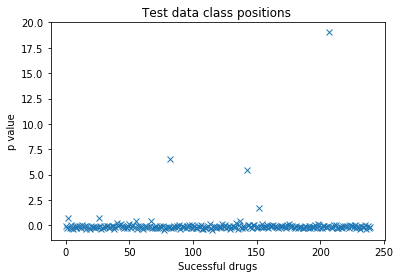

In [20]:
plt.title("Test data class positions ")
plt.xlabel("Successful drugs")
plt.ylabel("p value")
plt.plot(principalDf_test.iloc[:,1], 'x')
plt.show()


I then plotted the predicted class ownerships. 

<function matplotlib.pyplot.show(*args, **kw)>

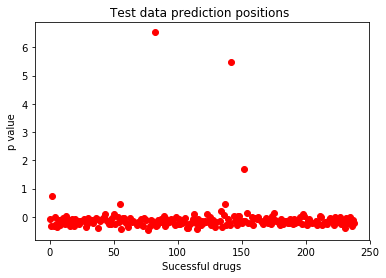

In [21]:
plt.title("Test data prediction positions ")
plt.xlabel("Successful drugs")
plt.ylabel("p value")
plt.plot(principalDf_test.iloc[Y_success_idx,1], 'or')
plt.show

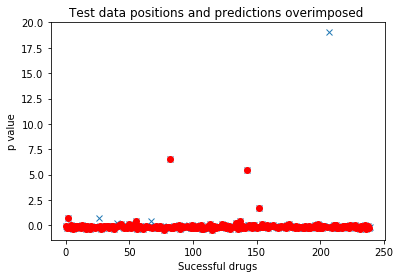

In [22]:
plt.title("Test data positions and predictions overimposed ")
plt.xlabel("Successful drugs")
plt.ylabel("p value")
plt.plot(principalDf_test.iloc[:,1], 'x')
plt.plot(principalDf_test.iloc[Y_success_idx,1], 'or')
plt.show()

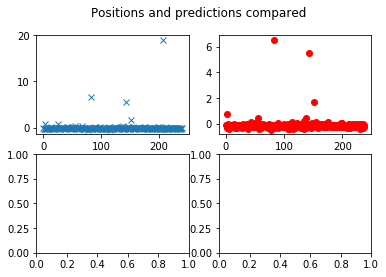

In [23]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
f.suptitle('Positions and predictions compared')


ax1.plot(principalDf_test.iloc[:,1], 'x')
ax2.plot(principalDf_test.iloc[Y_success_idx,1], 'or')


# Conclusion
We can observe that there appears to be a single outlier point in the test data positions. This is probabaly a false positive or some other introduced anonomly in the dataset, and could be a target for further data cleaning or data selection. However logistic regression appears to be able to successfully predict drug success, and the majority share similar traits, as indicated by the linear nature and low p value of the plots.   